<a href="https://colab.research.google.com/github/KUNAL8271/coding-ninjas-solution/blob/main/ISAAREVIEW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [304]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials


In [305]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [306]:

downloaded = drive.CreateFile({'id':'1Dv9kDXN2uQP8KAhQLcgirSyJNaUv6uGc'}) # replace the id with id of file you want to access
downloaded.GetContentFile('file(38).csv')

In [307]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt

In [308]:
df = pd.read_csv("file(38).csv")


In [309]:
df.drop('Device_Name' ,inplace=True,axis=1)

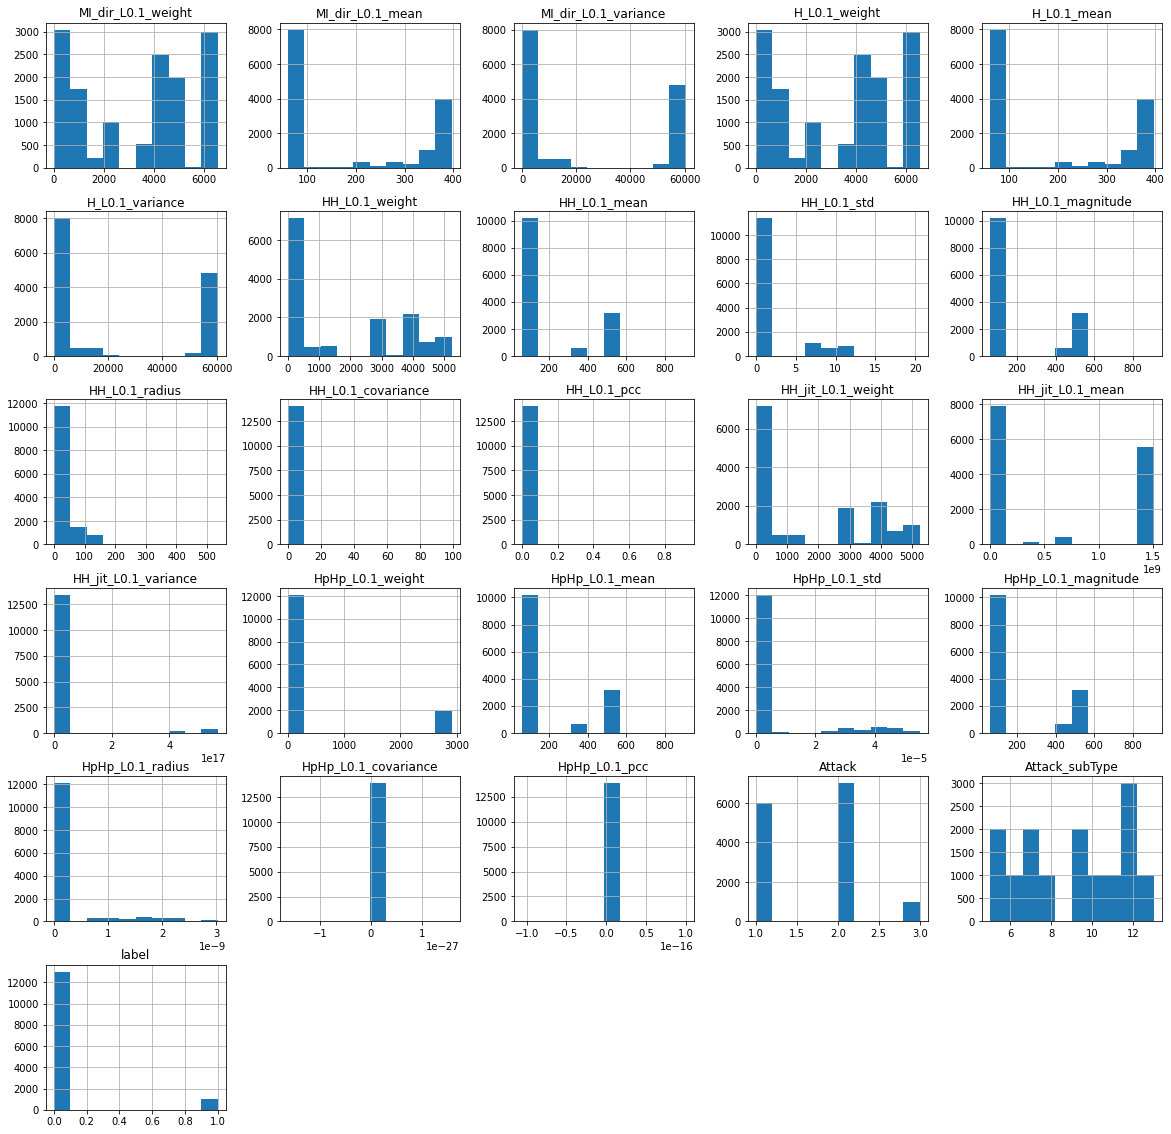

In [371]:
df.hist(figsize=(20,20))
plt.show()


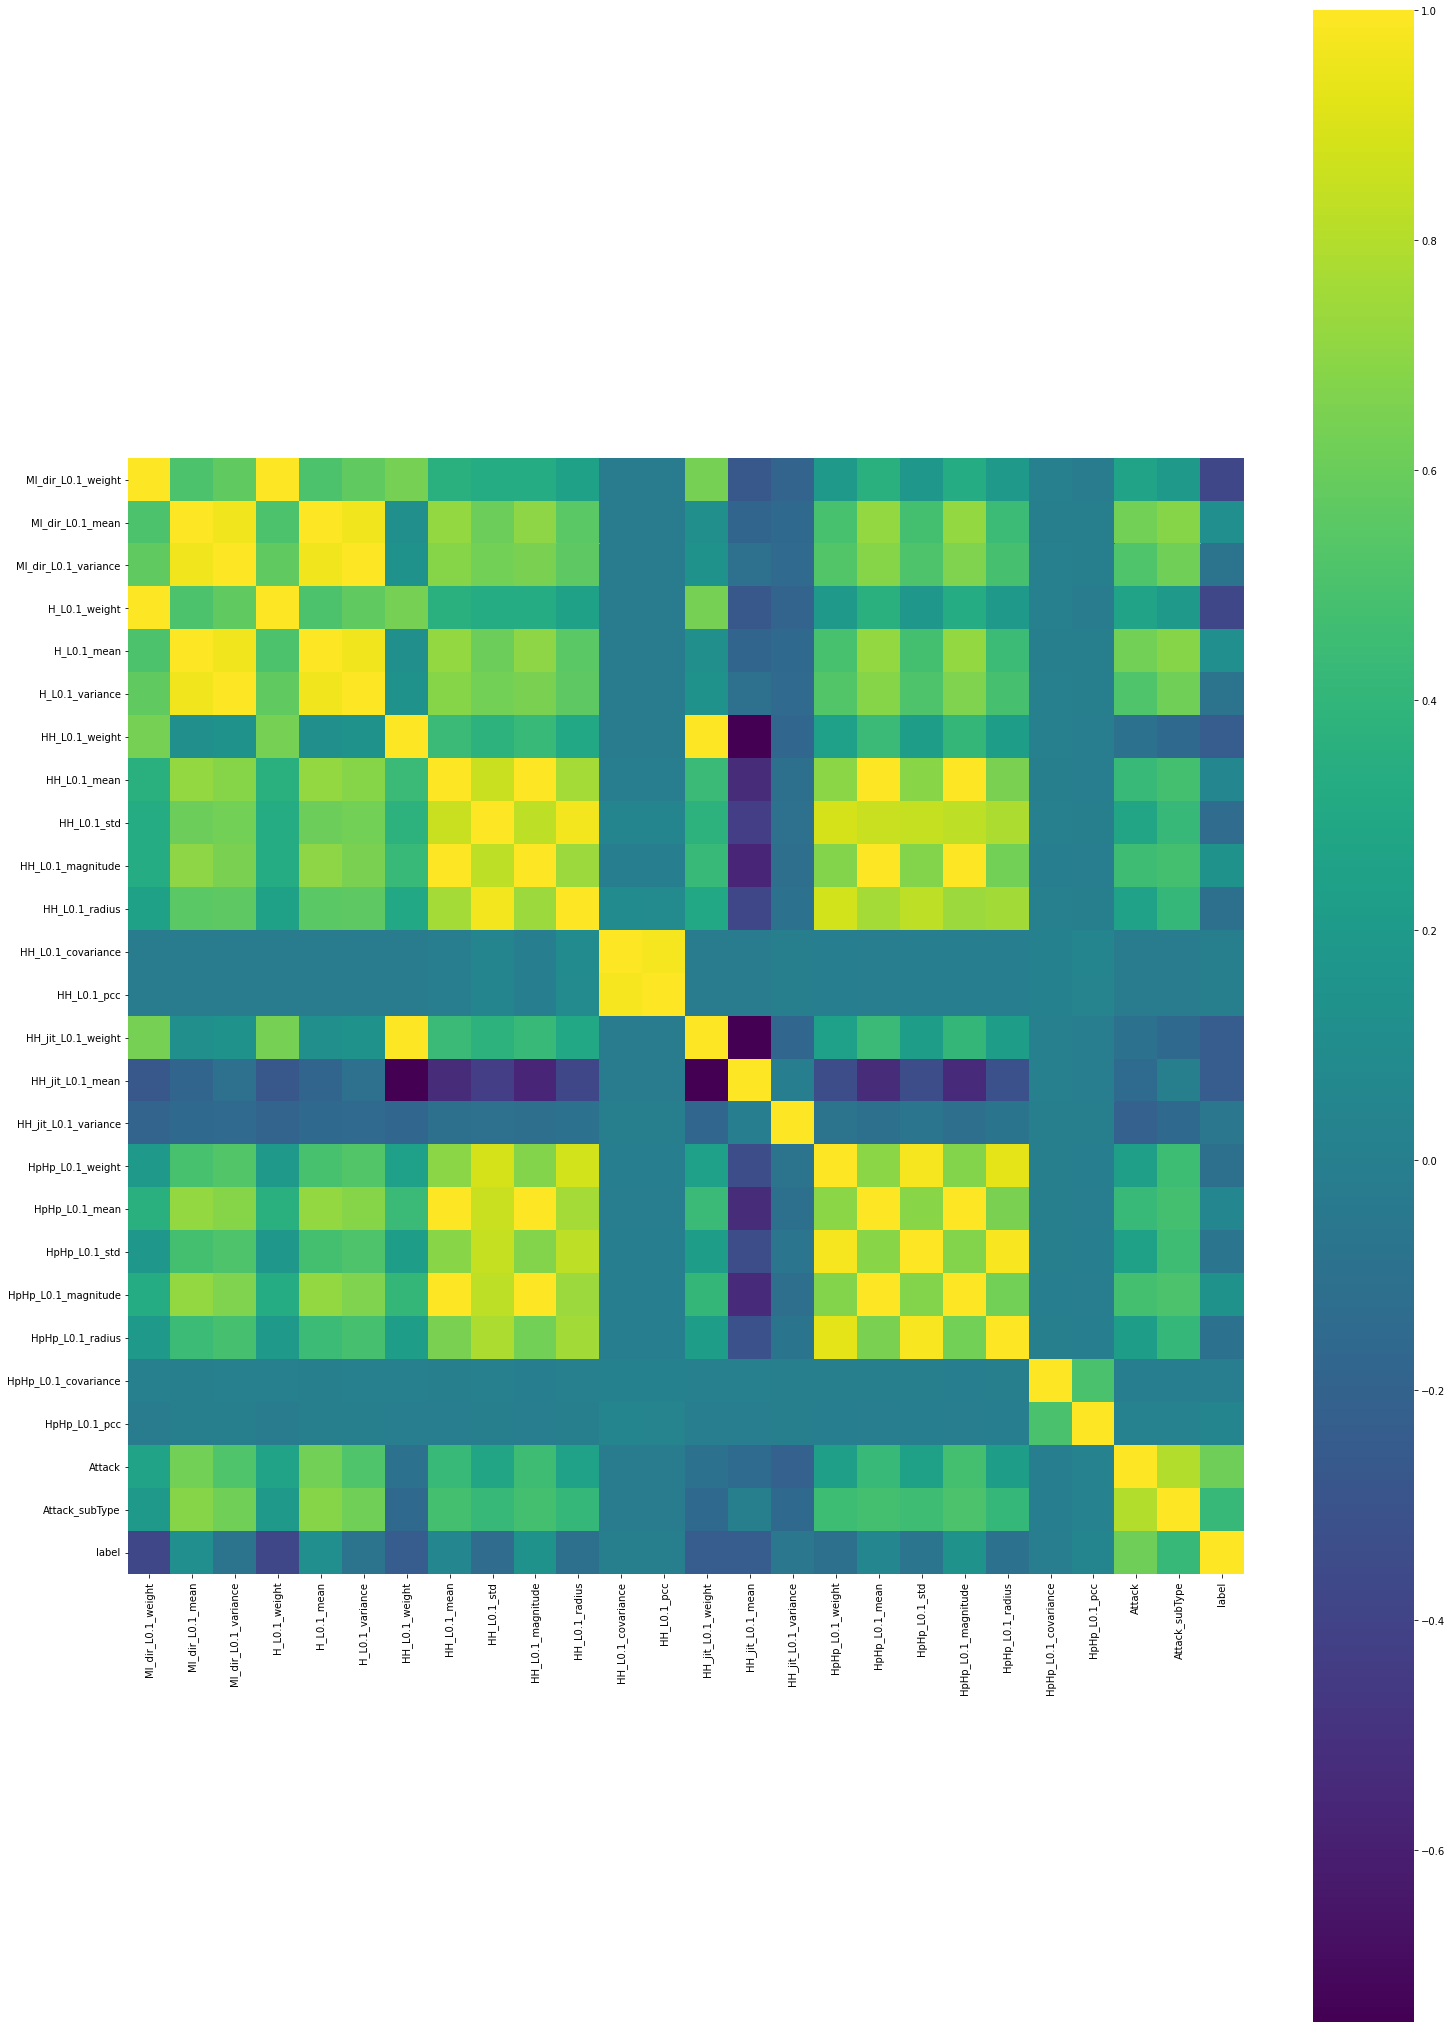

In [373]:
import seaborn as sns
%matplotlib inline
plt.figure(figsize=(25,37))
sns.heatmap(df.corr(),square=True,cmap="viridis")


In [310]:
df

,MI_dir_L0.1_weight,MI_dir_L0.1_mean,MI_dir_L0.1_variance,H_L0.1_weight,H_L0.1_mean,H_L0.1_variance,HH_L0.1_weight,HH_L0.1_mean,HH_L0.1_std,HH_L0.1_magnitude,HH_L0.1_radius,HH_L0.1_covariance,HH_L0.1_pcc,HH_jit_L0.1_weight,HH_jit_L0.1_mean,HH_jit_L0.1_variance,HpHp_L0.1_weight,HpHp_L0.1_mean,HpHp_L0.1_std,HpHp_L0.1_magnitude,HpHp_L0.1_radius,HpHp_L0.1_covariance,HpHp_L0.1_pcc,Attack,Attack_subType,label
0,1.000000,98.000000,0.000000e+00,1.000000,98.000000,0.000000e+00,1.000000,98.0,0.000000e+00,98.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.000000,1.505914e+09,0.000000e+00,1.000000,98.0,0.000000,98.000000,0.000000e+00,0.000000e+00,0.000000e+00,gafgyt,combo,0
1,1.931640,98.000000,1.818989e-12,1.931640,98.000000,1.818989e-12,1.931640,98.0,1.348699e-06,138.592929,1.818989e-12,0.000000e+00,0.000000e+00,1.931640,7.263102e+08,5.662344e+17,1.931640,98.0,0.000001,138.592929,1.818989e-12,0.000000e+00,0.000000e+00,gafgyt,combo,0
2,2.904273,86.981750,2.311822e+02,2.904273,86.981750,2.311822e+02,1.000000,66.0,0.000000e+00,114.856432,0.000000e+00,0.000000e+00,0.000000e+00,1.000000,1.505914e+09,0.000000e+00,1.000000,66.0,0.000000,114.856432,0.000000e+00,0.000000e+00,0.000000e+00,gafgyt,combo,0
3,3.902546,83.655268,2.040614e+02,3.902546,83.655268,2.040614e+02,1.000000,74.0,0.000000e+00,74.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.000000,1.505914e+09,0.000000e+00,1.000000,74.0,0.000000,74.000000,0.000000e+00,0.000000e+00,0.000000e+00,gafgyt,combo,0
4,4.902545,81.685828,1.775746e+02,4.902545,81.685828,1.775746e+02,2.000000,74.0,9.536743e-07,74.000000,9.094947e-13,0.000000e+00,0.000000e+00,2.000000,7.529571e+08,5.669445e+17,1.000000,74.0,0.000000,74.000000,0.000000e+00,0.000000e+00,0.000000e+00,gafgyt,combo,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13995,1.986540,138.187803,1.499737e+04,1.986540,138.187803,1.499737e+04,1.000133,60.0,0.000000e+00,60.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.000133,1.287717e+02,2.828180e-03,1.000133,60.0,0.000000,60.000000,0.000000e+00,0.000000e+00,0.000000e+00,Normal,Normal,1
13996,2.471900,215.784869,1.779299e+04,2.471900,215.784869,1.779299e+04,1.213117,330.0,3.810000e-06,431.490440,2.060000e-11,-2.170000e-36,-1.490000e-25,1.213117,2.508999e+01,3.890000e-05,1.213117,330.0,0.000004,431.490440,2.060000e-11,-2.170000e-36,-1.490000e-25,Normal,Normal,1
13997,3.471844,248.682411,1.534320e+04,3.471844,248.682411,1.534320e+04,1.213117,330.0,0.000000e+00,431.490440,1.460000e-11,-8.650000e-46,0.000000e+00,1.213117,2.509001e+01,4.200000e-05,1.213117,330.0,0.000000,431.490440,1.460000e-11,-8.650000e-46,0.000000e+00,Normal,Normal,1
13998,3.414214,193.418625,1.822250e+04,3.414214,193.418625,1.822250e+04,1.211822,60.0,0.000000e+00,84.852814,0.000000e+00,4.460000e-31,0.000000e+00,1.211822,2.520385e+01,6.477474e-01,1.211822,60.0,0.000000,84.852814,0.000000e+00,4.460000e-31,0.000000e+00,Normal,Normal,1


In [311]:
df.columns

Index(['MI_dir_L0.1_weight', 'MI_dir_L0.1_mean', 'MI_dir_L0.1_variance',
       'H_L0.1_weight', 'H_L0.1_mean', 'H_L0.1_variance', 'HH_L0.1_weight',
       'HH_L0.1_mean', 'HH_L0.1_std', 'HH_L0.1_magnitude', 'HH_L0.1_radius',
       'HH_L0.1_covariance', 'HH_L0.1_pcc', 'HH_jit_L0.1_weight',
       'HH_jit_L0.1_mean', 'HH_jit_L0.1_variance', 'HpHp_L0.1_weight',
       'HpHp_L0.1_mean', 'HpHp_L0.1_std', 'HpHp_L0.1_magnitude',
       'HpHp_L0.1_radius', 'HpHp_L0.1_covariance', 'HpHp_L0.1_pcc', 'Attack',
       'Attack_subType', 'label'],
      dtype='object')

In [312]:
attack_sub_instance=df.Attack_subType.unique()
attack_sub_instance

array(['combo', 'junk', 'scan', 'tcp', 'udp', 'ack', 'syn', 'udpplain',
       'Normal'], dtype=object)

In [313]:
dataMapping1={"gafgyt":1,"mirai":2,"Normal":3}
dataMapping2={"combo":5,"junk":6,"scan":7,"tcp":8,"udp":9,"ack":10,"syn":11,"udpplain":12,"Normal":13}
df['Attack']= df['Attack'].map(dataMapping1)
df['Attack_subType']= df['Attack_subType'].map(dataMapping2)


In [314]:
# attack_sub_instance=df.Attack_subType.unique()
# attack_sub_instance

In [315]:
# feature_cols = ['MI_dir_L0.1_weight', 'MI_dir_L0.1_mean', 'MI_dir_L0.1_variance',
#        'H_L0.1_weight', 'H_L0.1_mean', 'H_L0.1_variance', 'HH_L0.1_weight',
#        'HH_L0.1_mean', 'HH_L0.1_std', 'HH_L0.1_magnitude', 'HH_L0.1_radius',
#        'HH_L0.1_covariance', 'HH_L0.1_pcc', 'HH_jit_L0.1_weight',
#        'HH_jit_L0.1_mean', 'HH_jit_L0.1_variance', 'HpHp_L0.1_weight',
#        'HpHp_L0.1_mean', 'HpHp_L0.1_std', 'HpHp_L0.1_magnitude',
#        'HpHp_L0.1_radius', 'HpHp_L0.1_covariance', 'HpHp_L0.1_pcc']
x = df
y = df.label 

In [316]:
x.shape

(14000, 26)

In [317]:
y.shape

(14000,)

In [318]:
print(y)

0        0
1        0
2        0
3        0
4        0
        ..
13995    1
13996    1
13997    1
13998    1
13999    1
Name: label, Length: 14000, dtype: int64


In [319]:
print(x)

       MI_dir_L0.1_weight  MI_dir_L0.1_mean  ...  Attack_subType  label
0                1.000000         98.000000  ...               5      0
1                1.931640         98.000000  ...               5      0
2                2.904273         86.981750  ...               5      0
3                3.902546         83.655268  ...               5      0
4                4.902545         81.685828  ...               5      0
...                   ...               ...  ...             ...    ...
13995            1.986540        138.187803  ...              13      1
13996            2.471900        215.784869  ...              13      1
13997            3.471844        248.682411  ...              13      1
13998            3.414214        193.418625  ...              13      1
13999            1.851474        267.187606  ...              13      1

[14000 rows x 26 columns]


In [320]:
x

,MI_dir_L0.1_weight,MI_dir_L0.1_mean,MI_dir_L0.1_variance,H_L0.1_weight,H_L0.1_mean,H_L0.1_variance,HH_L0.1_weight,HH_L0.1_mean,HH_L0.1_std,HH_L0.1_magnitude,HH_L0.1_radius,HH_L0.1_covariance,HH_L0.1_pcc,HH_jit_L0.1_weight,HH_jit_L0.1_mean,HH_jit_L0.1_variance,HpHp_L0.1_weight,HpHp_L0.1_mean,HpHp_L0.1_std,HpHp_L0.1_magnitude,HpHp_L0.1_radius,HpHp_L0.1_covariance,HpHp_L0.1_pcc,Attack,Attack_subType,label
0,1.000000,98.000000,0.000000e+00,1.000000,98.000000,0.000000e+00,1.000000,98.0,0.000000e+00,98.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.000000,1.505914e+09,0.000000e+00,1.000000,98.0,0.000000,98.000000,0.000000e+00,0.000000e+00,0.000000e+00,1,5,0
1,1.931640,98.000000,1.818989e-12,1.931640,98.000000,1.818989e-12,1.931640,98.0,1.348699e-06,138.592929,1.818989e-12,0.000000e+00,0.000000e+00,1.931640,7.263102e+08,5.662344e+17,1.931640,98.0,0.000001,138.592929,1.818989e-12,0.000000e+00,0.000000e+00,1,5,0
2,2.904273,86.981750,2.311822e+02,2.904273,86.981750,2.311822e+02,1.000000,66.0,0.000000e+00,114.856432,0.000000e+00,0.000000e+00,0.000000e+00,1.000000,1.505914e+09,0.000000e+00,1.000000,66.0,0.000000,114.856432,0.000000e+00,0.000000e+00,0.000000e+00,1,5,0
3,3.902546,83.655268,2.040614e+02,3.902546,83.655268,2.040614e+02,1.000000,74.0,0.000000e+00,74.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.000000,1.505914e+09,0.000000e+00,1.000000,74.0,0.000000,74.000000,0.000000e+00,0.000000e+00,0.000000e+00,1,5,0
4,4.902545,81.685828,1.775746e+02,4.902545,81.685828,1.775746e+02,2.000000,74.0,9.536743e-07,74.000000,9.094947e-13,0.000000e+00,0.000000e+00,2.000000,7.529571e+08,5.669445e+17,1.000000,74.0,0.000000,74.000000,0.000000e+00,0.000000e+00,0.000000e+00,1,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13995,1.986540,138.187803,1.499737e+04,1.986540,138.187803,1.499737e+04,1.000133,60.0,0.000000e+00,60.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.000133,1.287717e+02,2.828180e-03,1.000133,60.0,0.000000,60.000000,0.000000e+00,0.000000e+00,0.000000e+00,3,13,1
13996,2.471900,215.784869,1.779299e+04,2.471900,215.784869,1.779299e+04,1.213117,330.0,3.810000e-06,431.490440,2.060000e-11,-2.170000e-36,-1.490000e-25,1.213117,2.508999e+01,3.890000e-05,1.213117,330.0,0.000004,431.490440,2.060000e-11,-2.170000e-36,-1.490000e-25,3,13,1
13997,3.471844,248.682411,1.534320e+04,3.471844,248.682411,1.534320e+04,1.213117,330.0,0.000000e+00,431.490440,1.460000e-11,-8.650000e-46,0.000000e+00,1.213117,2.509001e+01,4.200000e-05,1.213117,330.0,0.000000,431.490440,1.460000e-11,-8.650000e-46,0.000000e+00,3,13,1
13998,3.414214,193.418625,1.822250e+04,3.414214,193.418625,1.822250e+04,1.211822,60.0,0.000000e+00,84.852814,0.000000e+00,4.460000e-31,0.000000e+00,1.211822,2.520385e+01,6.477474e-01,1.211822,60.0,0.000000,84.852814,0.000000e+00,4.460000e-31,0.000000e+00,3,13,1


In [368]:
%%time
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state= 0  )

CPU times: user 8.66 ms, sys: 0 ns, total: 8.66 ms
Wall time: 9.04 ms


In [369]:
#create decision tree classifier object
clf = DecisionTreeClassifier()
#train Decision tree classifier
clf = clf.fit(x_train,y_train)
#predict the response for test datasett
y_pred = clf.predict(x_test)

In [352]:
# x_train

In [370]:
print("Accuracy:",metrics.accuracy_score(y_test,y_pred))

Accuracy: 1.0


In [340]:
from sklearn.metrics import classification_report

In [341]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1953
           1       1.00      1.00      1.00       147

    accuracy                           1.00      2100
   macro avg       1.00      1.00      1.00      2100
weighted avg       1.00      1.00      1.00      2100



In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[3922,    0],
       [   0,  278]])

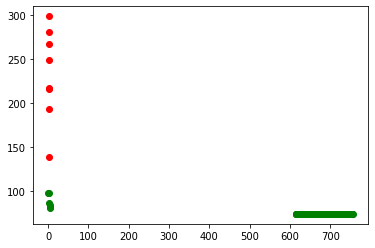

In [382]:
df0=df.head(160)
df1=df.tail(8)
df0=df0[df0.label==0]
df1=df1[df1.label==1]

plt.scatter(df0['MI_dir_L0.1_weight'],df0['MI_dir_L0.1_mean'],color='green')
plt.scatter(df1['MI_dir_L0.1_weight'],df1['MI_dir_L0.1_mean'],color='red')



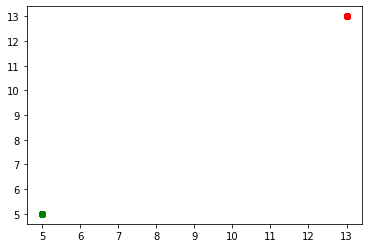

In [383]:
plt.scatter(df0['Attack_subType'],df0['Attack_subType'],color='green')
plt.scatter(df1['Attack_subType'],df1['Attack_subType'],color='red')

In [ ]:
from sklearn.tree import export_graphviz

In [ ]:
from sklearn.externals.six import StringIO 

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [ ]:
from IPython.display import Image

In [ ]:
import pydotplus

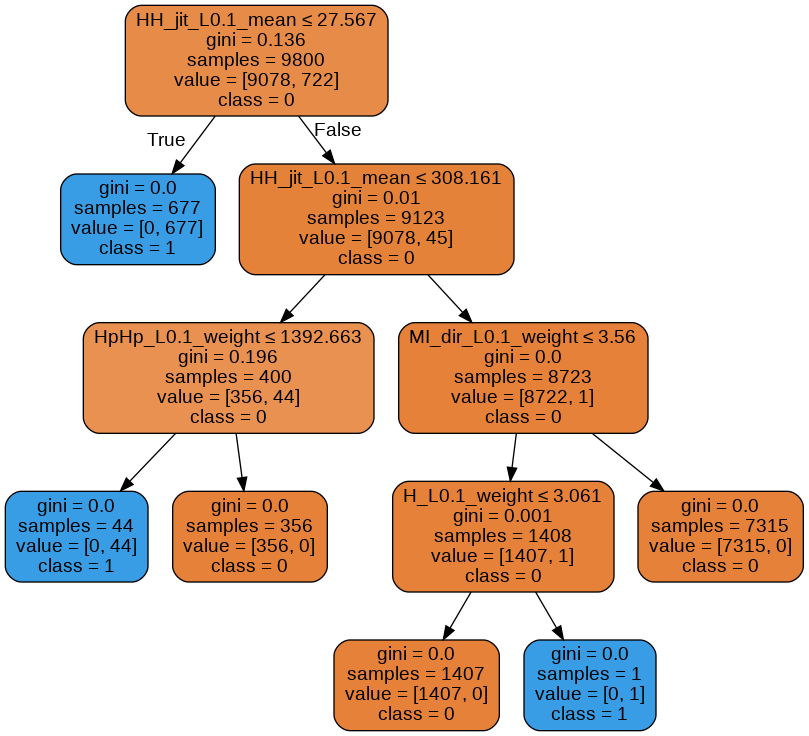

In [ ]:

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('file.png')
Image(graph.create_png())



In [ ]:
#create decision tree classifier object
clf = DecisionTreeClassifier(criterion="entropy",max_depth=3)
#train Decision tree classifier
clf = clf.fit(x_train,y_train)
#predict the response for test datasett
y_pred = clf.predict(x_test)
#model accuracy,how often is the classifier correct


In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test,y_pred))

Accuracy: 1.0


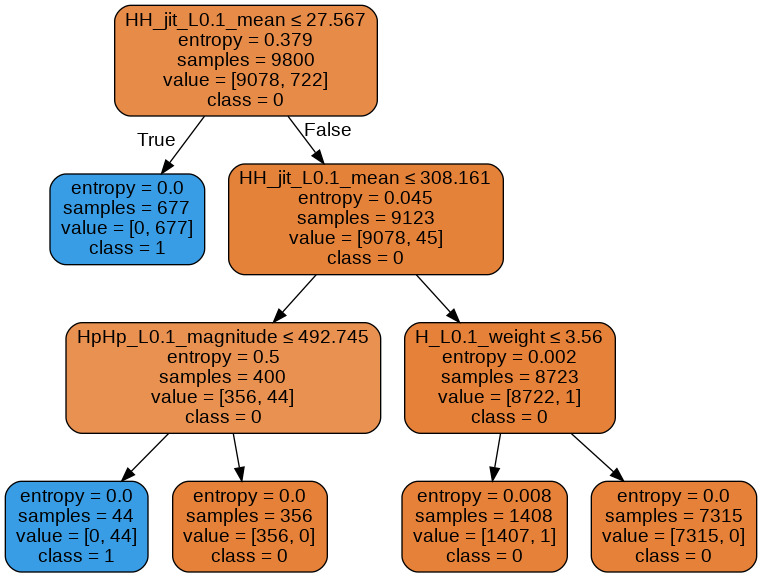

In [ ]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('file.png')
Image(graph.create_png())

